<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/mnist_numeric_recognition_keras_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image recognition using MNIST library**

**1. Data import and review**

In [0]:
# Load libraries
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers

from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
# Import data
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Review data
print(color.BOLD+'train_images_raw:'+color.END)
print('Shape: ', train_images_raw.shape)
print('Type: ', type(train_images_raw))
print('dtype: ', train_images_raw.dtype)
print('ndim: ', train_images_raw.ndim)

print(color.BOLD+'\ntrain_labels_raw:'+color.END)
print('Shape: ', train_labels_raw.shape)
print('Type: ', type(train_labels_raw))
print('dtype: ', train_labels_raw.dtype)
print('ndim: ', train_labels_raw.ndim)

print(color.BOLD+'\ntest_images_raw:'+color.END)
print('Shape: ', test_images_raw.shape)
print('Type: ', type(test_images_raw))
print('dtype: ', test_images_raw.dtype)
print('ndim: ', test_images_raw.ndim)

print(color.BOLD+'\ntest_labels_raw:'+color.END)
print('Shape: ', test_labels_raw.shape)
print('Type: ', type(test_labels_raw))
print('dtype: ', test_labels_raw.dtype)
print('ndim: ', test_labels_raw.ndim)

train_images_raw:
Shape:  (60000, 28, 28)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  3

train_labels_raw:
Shape:  (60000,)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  1

test_images_raw:
Shape:  (10000, 28, 28)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  3

test_labels_raw:
Shape:  (10000,)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  1



Review train_images_raw


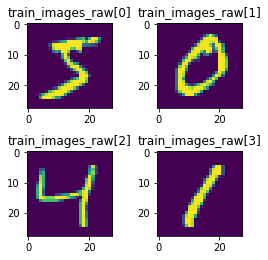


Review test_images_raw


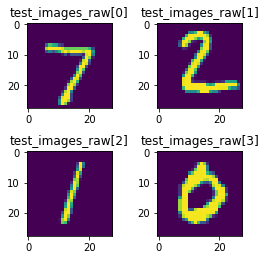

In [0]:
# Review examples
print(color.BOLD+color.UNDERLINE+'\nReview train_images_raw'+color.END)
fig=plt.figure(figsize=(4, 4))
columns = 2
rows = 2
for i in range(1, columns*rows+1):
    img = train_images_raw[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title('train_images_raw['+str(i-1)+']')
    plt.subplots_adjust(top = 0.75, bottom=0.01, hspace=0.5, wspace=0.4)    
plt.show()

print(color.BOLD+color.UNDERLINE+'\nReview test_images_raw'+color.END)
fig=plt.figure(figsize=(4, 4))
columns = 2
rows = 2
for i in range(1, columns*rows+1):
    img = test_images_raw[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title('test_images_raw['+str(i-1)+']')
    plt.subplots_adjust(top = 0.75, bottom=0.01, hspace=0.5, wspace=0.4)    
plt.show()

**2. Neural Network construction**

In [0]:
# Prepare image data
train_images = train_images_raw.reshape((60000, 28*28)).astype('float32') / 255
#train_images = train_images.astype('float32') / 255

test_images = test_images_raw.reshape((10000, 28*28)).astype('float32') / 255
#test_images = test_images.astype('float32') / 255

# Prepare labels
train_labels = to_categorical(train_labels_raw)
test_labels = to_categorical(test_labels_raw)

# Review data
print('Shape of train_images', train_images.shape)
print('Shape of train_labels', train_labels.shape)
print('Shape of test_images', test_images.shape)
print('Shape of test_labels', test_labels.shape)

Shape of train_images (60000, 784)
Shape of train_labels (60000, 10)
Shape of test_images (10000, 784)
Shape of test_labels (10000, 10)


In [0]:
# Construct network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Network compilation
# categorical_crossentropy is loss function as feedback sigal for learning the weight 
# tensors. Reduction of loss happens via minibatch stochastic gradient descent. Rules governing
# gradient descent defined in rmsprop 
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Training loop
network.fit(train_images, train_labels, epochs=5, batch_size=128)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 6s 101us/step - loss: 0.2656 - acc: 0.9227
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1099 - acc: 0.9677
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0740 - acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0548 - acc: 0.9834
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0407 - acc: 0.9875


In [0]:
# Review accuracy
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 1s 56us/step
test_loss:  0.06497121583826375
test_acc:  0.9798


In [0]:
# Spot test
print(color.BOLD+color.UNDERLINE+'\nReview samples'+color.END)

samples = 10

sample_pred = []
for i in range(1, samples+1):
    sample_pred.append(network.predict(test_images_raw[i-1].reshape((1, 28*28)).astype('float32')).argmax())

print('test_labels_raw:  ', list(test_labels_raw[0:samples]))
print('Predicted Labels: ', sample_pred[0:samples])
print('Identical?:', list(test_labels_raw[0:samples]) == sample_pred[0:samples] )

element_check = []
for j in range(1, samples+1):
  running_check = list(test_labels_raw[0:samples])[j-1] == sample_pred[0:samples][j-1]
  if running_check == True:
    element_check.append(0)
  else:
    element_check.append(1)

print('Total false predictions: ', sum(element_check), 'out of a total of', samples, 'samples')


Review samples
test_labels_raw:   [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predicted Labels:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Identical?: True
Total false predictions:  0 out of a total of 10 samples
